In [75]:
import numpy
import xarray
import matplotlib.pyplot as mp
import glob
import pandas
import cartopy

In [5]:
PRECT_root = '/ninad/NCAR_LENS/PRECT/'

Open pre-industrial control as multi-file dataset

In [ ]:
prect_pic_mfds = xarray.open_mfdataset(PRECT_root + 'b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.*.nc', \
                                       decode_times=False, \
                                       chunks={'lat':1, 'lon':1})

In [9]:
members = ['{:03d}'.format(i) for i in list(range(1,36))+list(range(101,106))]

prect_pic_mfds = xarray.open_mfdataset(PRECT_root + 'b.e11.B1850C5CN.f09_g16.005.cam.h1.PRECT.*.nc' ).sel(lat=slice(20,60),lon=slice(230,260))
#                                      chunks={'lat':10, 'lon':10})

prect_rcp = prect_pic_mfds['PRECT']*86400.*1000.
lon = prect_pic_mfds['lon']
lat = prect_pic_mfds['lat']
time = prect_pic_mfds['time'].values

In [74]:
time_datetime = numpy.copy(time) #pandas.to_datetime(time)
time_djf_indices = [d.month in [11,12,1,2,3] for d in time_datetime]

#prect_rcp = prect_rcp.where(prect_rcp<0.1, drop=True).values
#prect_rcp = prect_rcp.where(prect_rcp>0.1, drop=True).values
prect_rcp = prect_rcp.values
prect_rcp[prect_rcp<0.1]=numpy.nan

prect_pic_timemean = numpy.nanmean(prect_rcp, axis=0)
prect_djf_timemean = numpy.nanmean(prect_rcp[time_djf_indices,:,:], axis=0)

KeyboardInterrupt: 

In [26]:
prect_djf = prect_rcp[time_djf_indices,:,:]

In [27]:
prect_djf.shape

(271648, 43, 25)

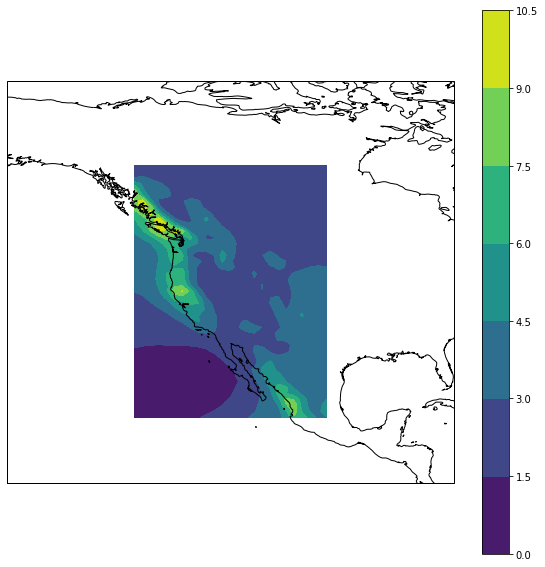

In [23]:
proj_map = cartopy.crs.PlateCarree()

fig = mp.figure(figsize=(10,10))

ax = fig.add_subplot(111, projection=proj_map)
ax.coastlines(resolution='50m')
plot = ax.contourf(prect_pic_mfds['lon'].values, prect_pic_mfds['lat'].values, prect_pic_timemean)
mp.colorbar(plot)
#ax.set_extent([-130,-100,20,55])
ax.set_extent([-150,-80,10,70])

In [36]:
ndays,nlat,nlon = prect_rcp.shape

* do 100 year precipitation days

In [37]:
prect_djf.shape

(271648, 43, 25)

In [38]:
time_datetime_djf = time_datetime[time_djf_indices]

In [39]:
nyears = time_datetime_djf[-1].year-time_datetime_djf[0].year+1

In [41]:
# to get a 100-year event, you want to figure out how many years are involved
# a 100-year event would happen 18 times in nyears

In [42]:
event_magnitude = 100 #100-year event will be 100
event_percentile = 1-(1/event_magnitude)

In [25]:
percentile_values = numpy.zeros((nlat,nlon))
for j in range(nlat):
    for k in range(nlon):
        # get rid of nans
        temporary_distro = prect_djf[:,j,k][~numpy.isnan(prect_djf[:,j,k])]
        percentile_values = numpy(percentile)

43